# Final Project

In [107]:
import sys
sys.path.append("C:/Users/sumit/OneDrive/Escritorio/Universidad/aprendizaje-automatico-IBM/venv/Lib/site-packages")

In [184]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import StratifiedShuffleSplit

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.

**Sections required in your report**:

- Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation and the benefits that your analysis provides to the business or stakeholders of this data. **✓**

- Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis. **✓**

- Brief summary of data exploration and actions taken for data cleaning and feature engineering.
    - Data Retrieving **✓**
    - Actions taken for data cleaning **✓**
        - Duplicate samples **✓**
        - Outliers treatment **✓**
    - Simple Data Exploration (EDA) **✓**
    - Feature Engineering **✓**
    - Advanced Data Exploration (EDA) **✓**

- Preparing data for classifier models:
    - Split the data into train and test **✓**
    - Data scaling
    - Modelling unbalanced classes
    - Final data for models

- Summary of training at least three different classifier models, preferably of different nature in explainability and predictability. For example, you can start with a simple logistic regression as a baseline, adding other models or ensemble models. Preferably, all your models use the same training and test splits, or the same cross-validation method. 

- A paragraph explaining which of your classifier models you recommend as a final model that best fits your needs in terms of accuracy and explainability.

- Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your classifier model.

- Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model after adding specific data features that may help you achieve a better explanation or a better prediction.

## Model focused on prediction or interpretation

This notebook will provide some classifier models aimed for **predicting** if a patient has heart disease or not. For this, we will use diferent types of explanatory variables such as: BMI, Smoking, PhysicalHealth etc.

The **main benefit** that this analysis provides to the business or stakeholders of this data is the ability for **predecting a patient with heart disease**. According to the CDC, heart disease is one of the leading causes of death for people of most races in the US (African Americans, American Indians and Alaska Natives, and white people). About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicator include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Computational developments, in turn, allow the application of machine learning methods to detect "patterns" from the data that can predict a patient's condition.

## Brief description of the data set and a summary of its attributes

**Dataset name:**

Key Indicators of Heart Disease

2020 annual CDC survey data of 400k adults related to their health status

**Description:**

According to the CDC, heart disease is one of the leading causes of death for people of most races in the US (African Americans, American Indians and Alaska Natives, and white people). About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicator include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Computational developments, in turn, allow the application of machine learning methods to detect "patterns" from the data that can predict a patient's condition.

**Summary of attributes:**

The dataset contains 18 variables (9 booleans, 5 strings and 4 decimals). In machine learning projects, "HeartDisease" can be used as the explonatory variable, but note that the classes are **heavily unbalanced**.

- **HeartDisease:** Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
- **BMI:** Body Mass Index
- **Smoking:** Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
- **AlcoholDrinking:** Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- **Stroke:** (Ever told) (you had) a stroke?
- **PhysicalHealth:** Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)
- **MentalHealth:** Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days)
- **DiffWalking:** Do you have serious difficulty walking or climbing stairs?
- **Sex:** Are you male or female?
- **AgeCategory:** Fourteen-level age category
- **Race:** Imputed race/ethnicity value
- **Diabetic:** (Ever told) (you had) diabetes?
- **PhysicalActivity:** Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- **GenHealth:** Would you say that in general your health is...
- **SleepTime:** On average, how many hours of sleep do you get in a 24-hour period?
- **Asthma:** (Ever told) (you had) asthma?
- **KidneyDisease:** Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease? 
- **SkinCancer:** (Ever told) (you had) skin cancer? 

## Brief summary of data exploration and actions taken for data cleaning and feature engineering.

### Data Retrieving

First look to our data from a .csv file

In [109]:
file_path = '../datasets/heart_2020_cleaned.csv'

heart_2020_df = pd.read_csv(file_path)

heart_2020_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [110]:
# Number of data points:
print("Data points:", heart_2020_df.shape[0])
print("------------------------------------------------------------------------------------------------------------------")

# Column names:
print("Column names:", list(heart_2020_df.columns))
print("------------------------------------------------------------------------------------------------------------------")

# Data type of each column
print("Column types:")
print(heart_2020_df.dtypes)

Data points: 319795
------------------------------------------------------------------------------------------------------------------
Column names: ['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']
------------------------------------------------------------------------------------------------------------------
Column types:
HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
Skin

### Actions taken for data cleaning

#### Duplicate samples

As can be seen there are duplicated samples, we proceed to eliminate it.

In [111]:
heart_2020_df.loc[heart_2020_df.duplicated()]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
2182,No,19.85,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7.0,No,No,No
3182,No,28.19,No,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Excellent,7.0,No,No,No
3397,No,26.54,No,No,No,0.0,0.0,No,Male,45-49,White,No,Yes,Excellent,6.0,No,No,No
3650,No,32.89,Yes,No,No,2.0,1.0,No,Female,50-54,White,No,Yes,Good,9.0,No,No,No
4061,No,25.84,No,No,No,0.0,0.0,No,Female,40-44,White,No,Yes,Excellent,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319671,No,25.06,No,No,No,0.0,0.0,No,Male,40-44,Hispanic,No,Yes,Excellent,7.0,No,No,No
319689,No,27.44,No,No,No,0.0,0.0,No,Female,30-34,Hispanic,No,Yes,Very good,6.0,No,No,No
319726,No,30.41,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,7.0,No,No,No
319751,No,34.96,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,6.0,No,No,No


In [112]:
heart_2020_df.drop_duplicates(inplace=True)
heart_2020_df.reset_index(inplace=True, drop=True)

In [113]:
print(heart_2020_df.shape)

heart_2020_df.loc[2180:]

(301717, 18)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
2180,No,27.26,No,No,No,0.0,0.0,No,Male,50-54,White,No,Yes,Excellent,6.0,No,No,No
2181,No,25.09,Yes,No,No,0.0,10.0,No,Female,55-59,White,No,Yes,Very good,8.0,No,No,No
2182,No,30.13,Yes,No,No,0.0,20.0,No,Male,45-49,White,No,Yes,Very good,10.0,No,No,No
2183,Yes,26.45,Yes,No,No,0.0,0.0,Yes,Male,80 or older,White,Yes,Yes,Good,8.0,No,No,Yes
2184,No,32.28,No,No,No,30.0,15.0,Yes,Female,65-69,White,No,No,Fair,7.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301712,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
301713,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
301714,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
301715,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


As next step we look at the information in each of the columns of our data set

**As can be seen, there are no missing data in our data set. This is because the dataset is already clean since its download.**

In case we found null values there are three methods we can approach:
- Removing
- Imputing
- Masking

In [114]:
heart_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301717 entries, 0 to 301716
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     30

#### Outliers Treatment

In [115]:
heart_2020_df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


For the treatment of the outliers we start by visualizing the boxplots of our numerical variables.

**Full answer from the dataset creator: [https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/discussion/315289]:**

Considering the following continuous variables:

- **BMI** - min.: 12; max.: 94.8 - with a BMI of 94.8, a person must be extremely morbidly obese (which is not that extremely improbable, given the prevalence of obesity in the US)
- (**PhysicalHealth**, **MentalHealth**) - this is a daily scale, from 0 to 30 days, outliers are hard to find here
- **SleepTime** - we can see above that the mean as well as the median are quite close to each other: the average sleep time of the respondents is between 7 and 8 hours, but we also have strange answers, such as 1 hour or 24 hours, which doesn't seem to be possible. When excluding these values, you can use the interquartile range, exclude 5% of extreme observations or use some statistical tests to determine whether a certain observation is an outlier.

In [116]:
numerical_cols = list(heart_2020_df.select_dtypes(exclude=object).columns)
categorical_cols = list(heart_2020_df.select_dtypes(object).columns)

print("numercial_cols", numerical_cols)
print("categorical_cols", categorical_cols)

numercial_cols ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
categorical_cols ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']


We won't take into account the outliers present in the **Physical** and **Mental Health** variables because these variables are in a daily scale, so outliers are hard to find here. But for **BMI** and **SleepTime** we will consider possible outliers as well as their treatment.

In [117]:
numerical_cols = [col_name for col_name in numerical_cols if 'Health' not in col_name]

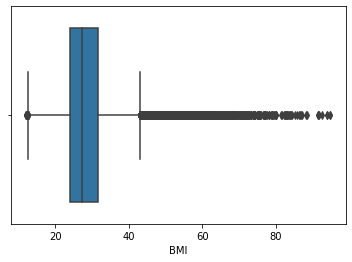

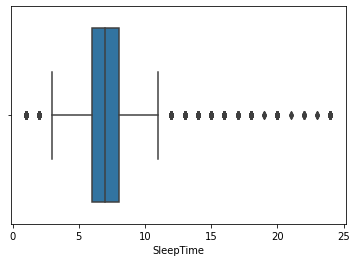

In [118]:
for i in numerical_cols:
    plt.figure()
    sns.boxplot(x=heart_2020_df[i])

Before proceeding with the treatment of these outliers, let us look at the number of outliers for each of the numerical variables selected.

So there are 8905 outliers values for the **BMI** variable, which represents about 3% of all population. The decision is to not remove them because they are not so discrepant from the average values and they probably are a natual part of the population we are studying. For the **SleepTime** variable there are 4542 outliers, which represents about 1.5% of all population. Again the decision is not to trim them because our average and median values are really close, so these outliers won't have much affect.

In [119]:
Q1 = heart_2020_df[numerical_cols].quantile(0.25)
Q3 = heart_2020_df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

print('INITIAL NUMBER OF OUTLIERS:')

((heart_2020_df[numerical_cols] < (Q1 - 1.5 * IQR)) | (heart_2020_df[numerical_cols] > (Q3 + 1.5 * IQR))).sum()

INITIAL NUMBER OF OUTLIERS:


BMI          8905
SleepTime    4542
dtype: int64

### Simple Data Exploration (EDA)

After treating the outliers we can proceed with the EDA.

First we show all our categorical features with their unique values.

In [120]:
for i in categorical_cols:
    print(i+":")
    print((heart_2020_df[i]).dtype)
    print(heart_2020_df[i].unique())
    print("Value counts:\n", heart_2020_df[i].value_counts(normalize=True))
    print("-"*40)

HeartDisease:
object
['No' 'Yes']
Value counts:
 No     0.909647
Yes    0.090353
Name: HeartDisease, dtype: float64
----------------------------------------
Smoking:
object
['Yes' 'No']
Value counts:
 No     0.577733
Yes    0.422267
Name: Smoking, dtype: float64
----------------------------------------
AlcoholDrinking:
object
['No' 'Yes']
Value counts:
 No     0.928473
Yes    0.071527
Name: AlcoholDrinking, dtype: float64
----------------------------------------
Stroke:
object
['No' 'Yes']
Value counts:
 No     0.960016
Yes    0.039984
Name: Stroke, dtype: float64
----------------------------------------
DiffWalking:
object
['No' 'Yes']
Value counts:
 No     0.852991
Yes    0.147009
Name: DiffWalking, dtype: float64
----------------------------------------
Sex:
object
['Female' 'Male']
Value counts:
 Female    0.529208
Male      0.470792
Name: Sex, dtype: float64
----------------------------------------
AgeCategory:
object
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' 

As a next step, we visualize the basic statistical measures of our dataset

We can observe, the mean **bmi** of the sample is 28.44 which is above the normal range [18.5 - 24.9]. In addition, the mean sleepTime is 7h.

In [121]:
heart_2020_df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


Now we will do some basic data visualizations.

As we can see, our dataset is quite unbalanced. That is the 91% of the people don't have HeartDisease.

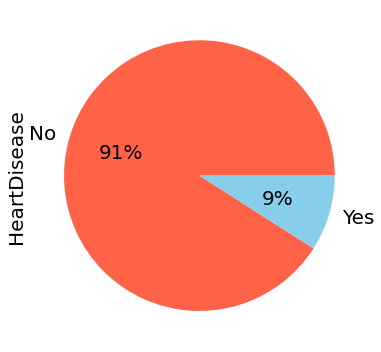

In [122]:
fig, ax1 = plt.subplots(ncols=1, figsize=(10, 5))

heart_2020_df.groupby('HeartDisease').size().plot(kind='pie', textprops={'fontsize': 20},
                                                  colors=['tomato', 'skyblue'], autopct='%1.0f%%', ax=ax1)
ax1.set_ylabel('HeartDisease', size=20)
plt.tight_layout()

### Feature Engineering

As the first step of this section, we proceed to look at whether we have biased variables printing their **skew values**. As can be seen, the variable **BMI** seem to be positively skewed. But, as our aim is to biuld some clasifier models, we don't need our features to have normal distribution.

The **PhysicalHealth** and **MentalHealth** variables do seem to be positively skewed, but as they are scale variables we will not transform them.

In [123]:
skew_vals = heart_2020_df.skew()
skew_vals

C:\Users\sumit\AppData\Local\Temp/ipykernel_12168/2652780613.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skew_vals = heart_2020_df.skew()


BMI               1.297737
PhysicalHealth    2.501000
MentalHealth      2.237470
SleepTime         0.697224
dtype: float64

Let's confirm this by looking at their graphs.

C:\Users\sumit\AppData\Local\Temp/ipykernel_12168/2288288962.py:6: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


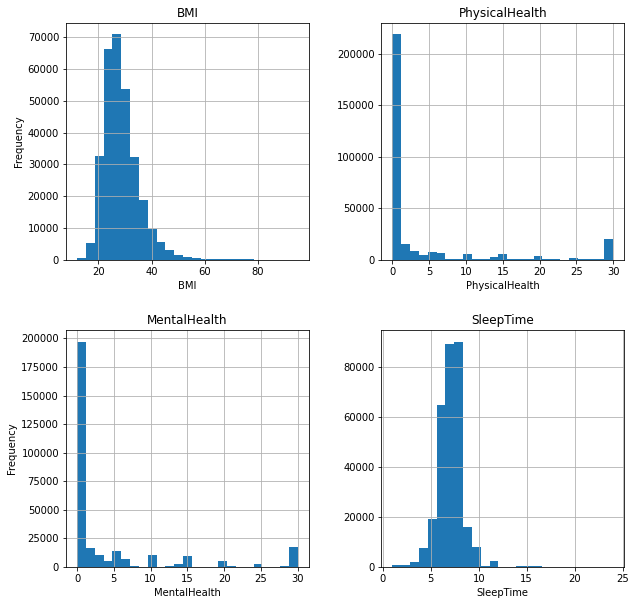

In [124]:
axList = heart_2020_df.hist(bins=25, figsize=(10,10))

for ax in axList.flatten():
    ax.set_xlabel(ax.title.get_text())
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')

Next we will start with the **treatment of the categorical variables**.

First, we show all the different categories of our categorical variables as well as their count.

As can be seen, all categories have significant samples, so there is no need to regroup into other more general categories.

In [125]:
heart_2020_df_orignal = heart_2020_df.copy()
heart_2020_df_orignal.shape

(301717, 18)

In [126]:
binary_categorical_vars = []
ordinal_categorical_vars = []
one_hot_categorical_vars = []

In [127]:
for categorical_col in categorical_cols:
    value_counts = heart_2020_df[categorical_col].value_counts()
    if len(value_counts.index) == 2:
        binary_categorical_vars.append(categorical_col)
    elif len(value_counts.index) > 2 and categorical_col != 'GenHealth':
        one_hot_categorical_vars.append(categorical_col)
    else:
        ordinal_categorical_vars.append(categorical_col)
    print(value_counts)
    print('-'*40)

No     274456
Yes     27261
Name: HeartDisease, dtype: int64
----------------------------------------
No     174312
Yes    127405
Name: Smoking, dtype: int64
----------------------------------------
No     280136
Yes     21581
Name: AlcoholDrinking, dtype: int64
----------------------------------------
No     289653
Yes     12064
Name: Stroke, dtype: int64
----------------------------------------
No     257362
Yes     44355
Name: DiffWalking, dtype: int64
----------------------------------------
Female    159671
Male      142046
Name: Sex, dtype: int64
----------------------------------------
65-69          31670
60-64          31219
70-74          29273
55-59          27610
50-54          23736
80 or older    23352
75-79          20713
45-49          20518
18-24          19998
40-44          19837
35-39          19526
30-34          17953
25-29          16312
Name: AgeCategory, dtype: int64
----------------------------------------
White                             227724
Hispanic     

In [128]:
print(binary_categorical_vars)
print(ordinal_categorical_vars)
print(one_hot_categorical_vars)

['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
['GenHealth']
['AgeCategory', 'Race', 'Diabetic']


We will use **Binary encoding** for variables that have only two possible labels, **Ordinal encoding** for the GenHealth variable and **One-Hot encoding** for the rest of the variables.

In [129]:
# Binary encoding
le = LabelEncoder()
for binary_categorical_var in binary_categorical_vars:
    heart_2020_df[binary_categorical_var] = le.fit_transform(heart_2020_df[binary_categorical_var])

In [130]:
# One-Hot encoding
heart_2020_df = pd.get_dummies(heart_2020_df, columns=one_hot_categorical_vars, drop_first=True)

In [131]:
# Ordinal encoding
gen_health_map = {'Very good':3,'Fair':1,'Good':2,'Poor':0,'Excellent':4}
heart_2020_df[ordinal_categorical_vars[0]]=heart_2020_df.loc[:,ordinal_categorical_vars[0]] = heart_2020_df[ordinal_categorical_vars[0]].map(gen_health_map)

In [132]:
heart_2020_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,AgeCategory_75-79,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0,16.60,1,0,0,3.0,30.0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


### Advanced Data Exploration (EDA)

We start by visualising the correlations of each variable with our target variable: **HeartDisease**.

As can be seen, there are some logic conclusions:
- **Age**: the older the person, the greater are the correlation of being a heart disease patient.
- **DiffWalikg**: if a person has serious difficulty walking or climbing stairs, seems to be positive correlated to having a HeartDisease. The same correlation occurs with the **stroke** variable.
- Finally, if a person is diabetic, smokes, have had kideney disease or have physical health problems seems to be positive correlated with the heart disease variable.

In [133]:
heart_2020_df.corr()['HeartDisease'].sort_values()

GenHealth                          -0.237920
PhysicalActivity                   -0.093597
AgeCategory_35-39                  -0.068994
AgeCategory_25-29                  -0.068546
AgeCategory_30-34                  -0.068228
AgeCategory_40-44                  -0.060936
AgeCategory_45-49                  -0.051013
Race_Hispanic                      -0.040680
AlcoholDrinking                    -0.036289
Race_Asian                         -0.032841
AgeCategory_50-54                  -0.032705
Diabetic_Yes (during pregnancy)    -0.015508
Race_Black                         -0.014517
AgeCategory_55-59                  -0.011854
Race_Other                         -0.006076
SleepTime                           0.010834
Diabetic_No, borderline diabetes    0.013793
AgeCategory_60-64                   0.018989
MentalHealth                        0.020913
Asthma                              0.035784
AgeCategory_65-69                   0.045734
BMI                                 0.047260
Race_White

We now proceed to visualise the correlation matrix for all our variables.

C:\Users\sumit\AppData\Local\Temp/ipykernel_12168/3941788364.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),


<AxesSubplot:>

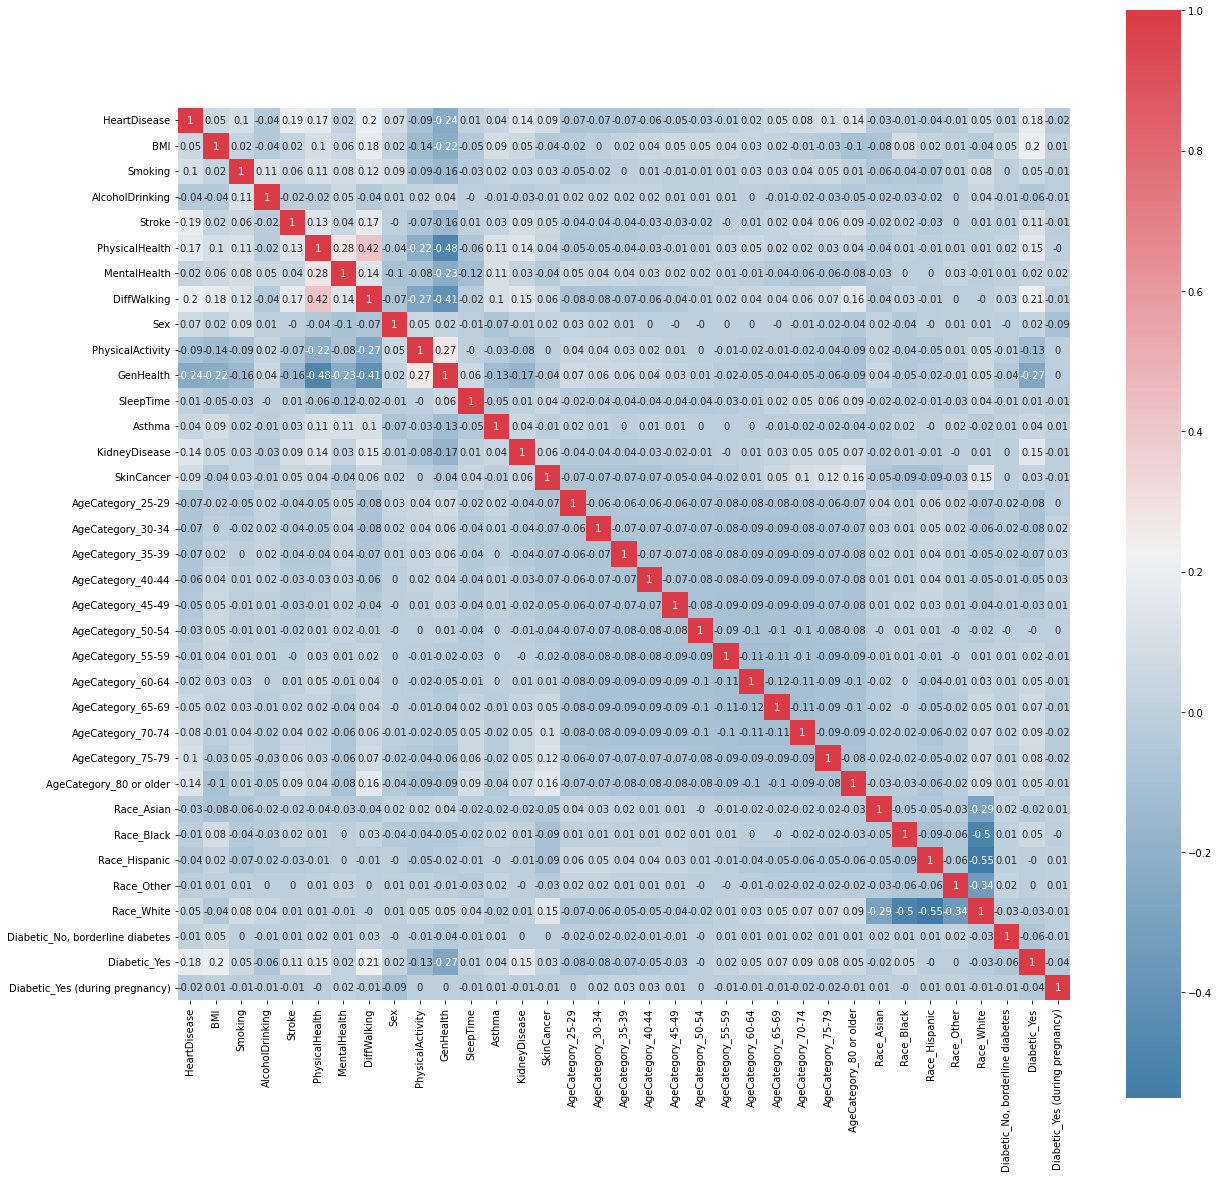

In [134]:
f, ax = plt.subplots(figsize=(20,20))
corr = heart_2020_df.corr().round(2)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, annot=True, ax=ax)

We begin by showing the heart disease patients for some of the categorical variables in our data set.

As we can see, there are more female (0) than male (1), but **it is the latter one that suffer from a heart disease problem**.  

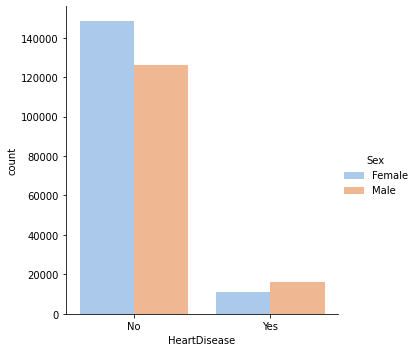

In [135]:
sns.catplot(x="HeartDisease", kind="count",hue = 'Sex', palette="pastel", data=heart_2020_df_orignal)

Here we can see what we mentioned above. **Older people suffer the most from heart disease problem**.

But it is rare that people in good health are the ones who have suffered the most from the heart disease problem in our dataset. May be many of these observations have suffered heart disease problems doing exercise, which is quite common.

<AxesSubplot:title={'center':'Gen Health'}, xlabel='HeartDisease', ylabel='count'>

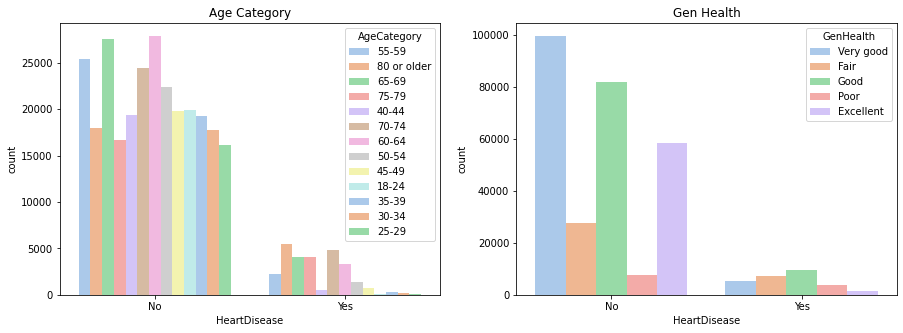

In [155]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].set_title('Age Category')
ax[1].set_title('Gen Health')
sns.countplot(x="HeartDisease", hue='AgeCategory', palette="pastel", data=heart_2020_df_orignal, ax=ax[0])
sns.countplot(x="HeartDisease", hue='GenHealth', palette="pastel", data=heart_2020_df_orignal, ax=ax[1])

Now we plot some other variables which were positively correlated with the HeartDisease variable. As we can see, **people who smoke seems to have greater heart disease problems**.

Before we saw, that the variables: KidneyDisease, Stroke and DiffWalking were positively correlated with our target variable. But in the below plots, it doesn't seem to matter if the person had KidneyDisease, Stroke or DiffWalking. 

<AxesSubplot:title={'center':'Diff Walking'}, xlabel='HeartDisease', ylabel='count'>

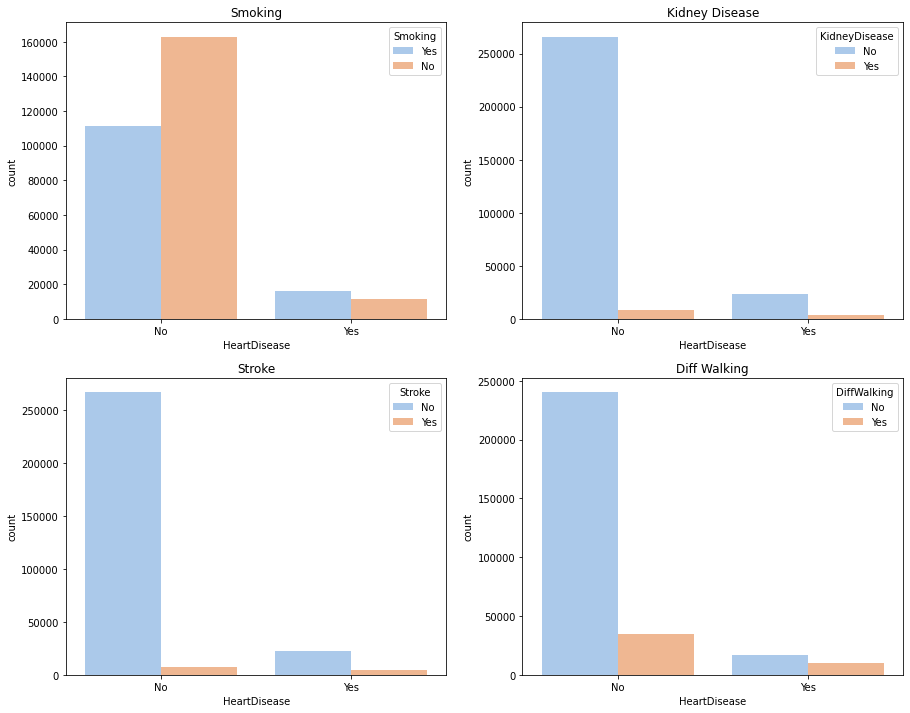

In [166]:
fig, ax = plt.subplots(2,2, figsize=(15,12))
ax[0][0].set_title('Smoking')
ax[0][1].set_title('Kidney Disease')
ax[1][0].set_title('Stroke')
ax[1][1].set_title('Diff Walking')
sns.countplot(x="HeartDisease", hue='Smoking', palette="pastel", data=heart_2020_df_orignal, ax=ax[0][0])
sns.countplot(x="HeartDisease", hue='KidneyDisease', palette="pastel", data=heart_2020_df_orignal, ax=ax[0][1])
sns.countplot(x="HeartDisease", hue='Stroke', palette="pastel", data=heart_2020_df_orignal, ax=ax[1][0])
sns.countplot(x="HeartDisease", hue='DiffWalking', palette="pastel", data=heart_2020_df_orignal, ax=ax[1][1])

Finally, we explore our **Diabetics** variable as same as others.

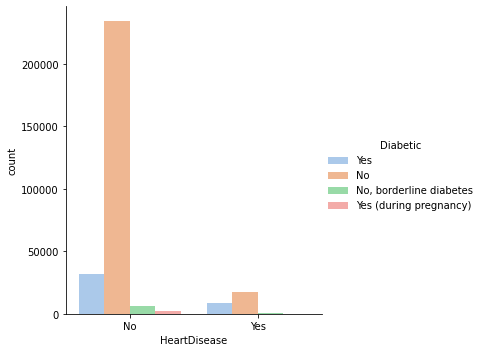

In [167]:
sns.catplot(x="HeartDisease", kind="count", hue='Diabetic', palette="pastel", data=heart_2020_df_orignal)

Now we plot the **BMI distribution** for both catagories of HeartDisease variable. As can be observed, there doesn't seems to be a great differnce in the BMI variable between observations who have Heart disease problem and observations that don't.  

C:\Users/sumit/OneDrive/Escritorio/Universidad/aprendizaje-automatico-IBM/venv/Lib/site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users/sumit/OneDrive/Escritorio/Universidad/aprendizaje-automatico-IBM/venv/Lib/site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of BMI for non Heart Disease patients')

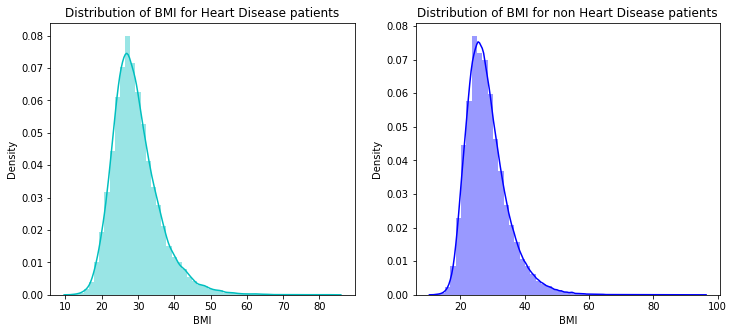

In [172]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(heart_2020_df[(heart_2020_df.HeartDisease == 1)]["BMI"],color='c',ax=ax)
ax.set_title('Distribution of BMI for Heart Disease patients')

ax=f.add_subplot(122)
sns.distplot(heart_2020_df[(heart_2020_df.HeartDisease == 0)]['BMI'],color='b',ax=ax)
ax.set_title('Distribution of BMI for non Heart Disease patients')

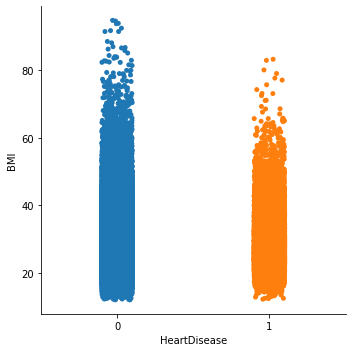

In [180]:
sns.catplot(x="HeartDisease", y="BMI", data=heart_2020_df)

Now we plot the above distribution for the variables: **Physical** and **Mental Health**.

Here we can observe that for HeartDisease patients there are greater number of PhysicalHealth problems

C:\Users/sumit/OneDrive/Escritorio/Universidad/aprendizaje-automatico-IBM/venv/Lib/site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users/sumit/OneDrive/Escritorio/Universidad/aprendizaje-automatico-IBM/venv/Lib/site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of PhysicalHealth for non Heart Disease patients')

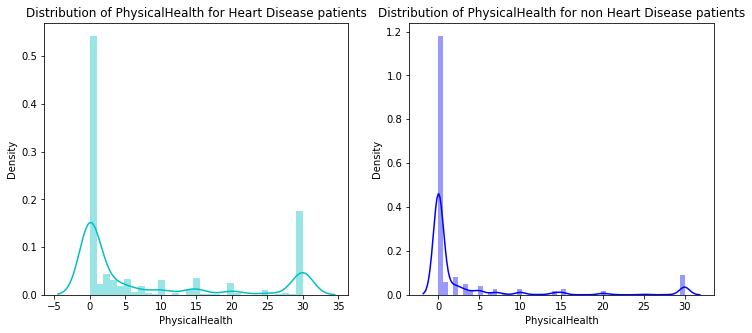

In [176]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(heart_2020_df[(heart_2020_df.HeartDisease == 1)]["PhysicalHealth"],color='c',ax=ax)
ax.set_title('Distribution of PhysicalHealth for Heart Disease patients')

ax=f.add_subplot(122)
sns.distplot(heart_2020_df[(heart_2020_df.HeartDisease == 0)]['PhysicalHealth'],color='b',ax=ax)
ax.set_title('Distribution of PhysicalHealth for non Heart Disease patients')

C:\Users/sumit/OneDrive/Escritorio/Universidad/aprendizaje-automatico-IBM/venv/Lib/site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users/sumit/OneDrive/Escritorio/Universidad/aprendizaje-automatico-IBM/venv/Lib/site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of MentalHealth for non Heart Disease patients')

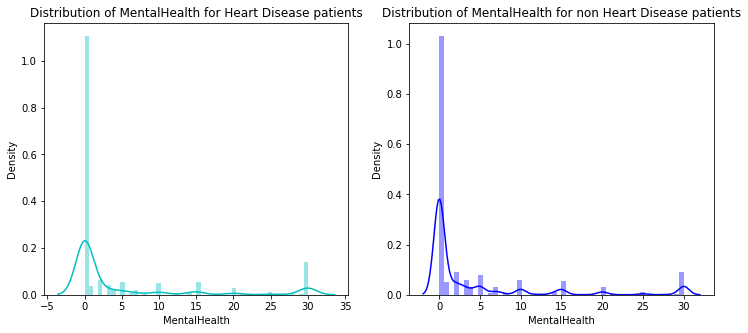

In [175]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(heart_2020_df[(heart_2020_df.HeartDisease == 1)]["MentalHealth"],color='c',ax=ax)
ax.set_title('Distribution of MentalHealth for Heart Disease patients')

ax=f.add_subplot(122)
sns.distplot(heart_2020_df[(heart_2020_df.HeartDisease == 0)]['MentalHealth'],color='b',ax=ax)
ax.set_title('Distribution of MentalHealth for non Heart Disease patients')

## Preparing data for classifier models

### Train-Test split

We first use the **Stratified ShuffleSplit** cross-validator for splitting our dataset into train and test splits preserving the percentage of samples for each class (0 and 1). 

In [193]:
feature_cols = heart_2020_df.columns[1:]
feature_cols

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'PhysicalActivity', 'GenHealth',
       'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer',
       'AgeCategory_25-29', 'AgeCategory_30-34', 'AgeCategory_35-39',
       'AgeCategory_40-44', 'AgeCategory_45-49', 'AgeCategory_50-54',
       'AgeCategory_55-59', 'AgeCategory_60-64', 'AgeCategory_65-69',
       'AgeCategory_70-74', 'AgeCategory_75-79', 'AgeCategory_80 or older',
       'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
       'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)'],
      dtype='object')

In [194]:
# This creates a generator
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

# Get the index values from the generator
train_idx, test_idx = next(sss.split(heart_2020_df[feature_cols], heart_2020_df['HeartDisease']))

# Create the data sets
X_train = heart_2020_df.loc[train_idx, feature_cols]
y_train = heart_2020_df.loc[train_idx, 'HeartDisease']

X_test = heart_2020_df.loc[test_idx, feature_cols]
y_test = heart_2020_df.loc[test_idx, 'HeartDisease']

In [195]:
y_train.value_counts(normalize=True).sort_index()

0    0.909646
1    0.090354
Name: HeartDisease, dtype: float64

In [196]:
y_test.value_counts(normalize=True).sort_index()

0    0.909651
1    0.090349
Name: HeartDisease, dtype: float64

### Data scaling

We will use the **Min Max Scaler** which transforms features by scaling each feature to a given range. In this notebook, we will scale the following variables: **BMI**,**Physical and Mental Health** and **SleepTime**  